In [2]:
import numpy as np
import pywt

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = np.loadtxt('mit_arrythmia/100.txt')[:, 1]

In [4]:
Fs = 360

In [5]:
t = np.linspace(0, 1.*x.shape[0]/Fs, x.shape[0])

# ECG signal

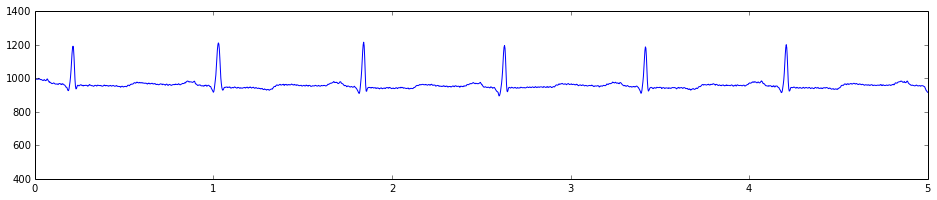

In [6]:
plt.figure(figsize=(16, 3))
plt.plot(t, x)
plt.xlim(0, 5)
plt.show()

In [7]:
print "# of samples in the 1st 5 sec", x[(t>=0) & (t<=5)].shape[0]

# of samples in the 1st 5 sec 1800


## Compresed ECG

In [7]:
cA, cD = pywt.dwt(x, 'db1')

In [10]:
t_w = np.linspace(0, t[-1], cA.shape[0])

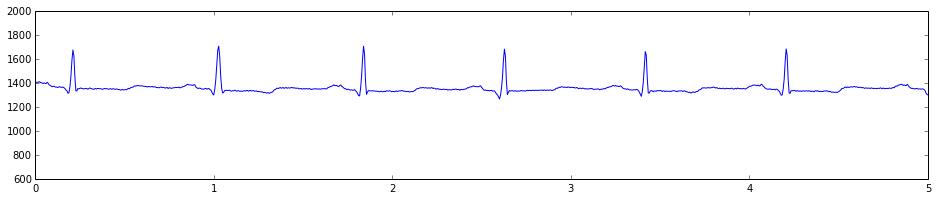

In [11]:
plt.figure(figsize=(16, 3))
plt.plot(t_w, cA)
plt.xlim(0, 5)
plt.show()

In [12]:
print "# of samples in the 1st 5 sec", cA[(t_w>=0)&(t_w<=5)].shape[0]

# of samples in the 1st 5 sec 900


In [16]:
sig = []

for i in range(0, x.shape[0]-10, 10):
    cA, cD = pywt.dwt(x[i:(i+10)], 'db1')
    sig.extend(cA)
    
sig = np.array(sig)

# Compressed ECG with DWT applied realtime

In [17]:
t_w = np.linspace(0, t[-1], sig.shape[0])

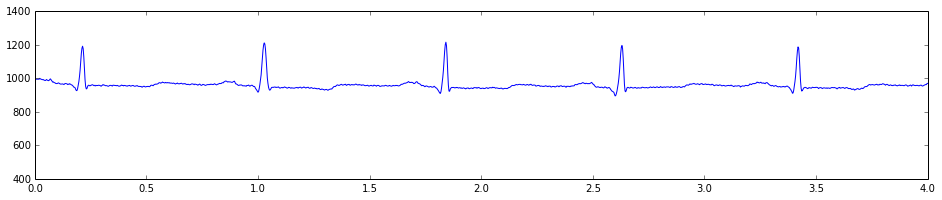

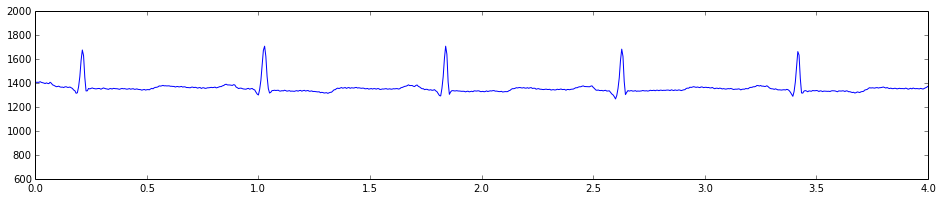

In [18]:
plt.figure(figsize=(16, 3))
plt.plot(t, x)
plt.xlim(0, 4)
plt.show()

plt.figure(figsize=(16, 3))
plt.plot(t_w, sig)
plt.xlim(0, 4)
plt.show()

In [ ]:
1./np.mean(np.diff(t_w))

In [20]:
print "# of samples in the 1st 4 sec", sig[(t_w>=0)&(t_w<=4)].shape[0]

# of samples in the 1st 4 sec 720
